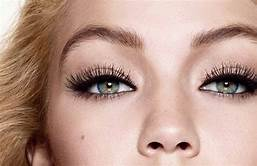

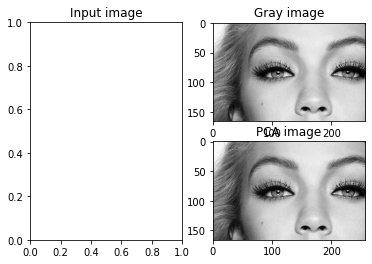

In [8]:
#LIBRERIE
import numpy as np
import matplotlib.pyplot as plt
#trasformiamo i dati da uno spazio di dimensioni elevate a uno spazio di dimensioni ridotte 
#con una perdita minima di informazioni e rimuovendo anche la ridondanza nel set di dati.
from sklearn.decomposition import PCA 
from google.colab.patches import cv2_imshow

import cv2

#lINEARIZZO L'IMMAGINE
def lin_image(base_image):
    (H,W,channel) = np.shape(base_image) #prendo la forma (altezza,dimensione e canali)
    #Numpy squeeze() restituisce l'array di input con il sottoinsieme della dimensione avente una lunghezza uguale a uno rimosso dall'array.
    lin_image = base_image.reshape(H*W,channel).squeeze()  # linearizzo 
    return lin_image

#Delinearizzare un'immagine pre-linearizzata
def unlin_image(in_image,H,W):
    (L,channel) = np.shape(in_image) #Prendo la forma e salvo in L
    #Vado a verificare le possibili dimensioni dell'immagine
    if L != H*W:
        raise ValueError('The length of the image does not correspond to the Height and width input') #gestiamo l'eccezione
    # delinearizzo
    base_image = in_image.reshape(H,W,channel).squeeze() #torna alla forma iniziale 
    return base_image

## Calcolo il PCA dell'immagine
def PCAImage(image,n_components=1): #spazio dimensionale (?)
    # Ottengo la dimensione dell'immagine
    (H, W, ch) = np.shape(image)

    #Creo un oggetto PCA dalla libreria scikit-learn
    sklearn_pca = PCA(n_components=n_components)

    #Applico il PCA all'immagine linearizzata
    lin_pca = sklearn_pca.fit_transform(lin_image(image))

    #Trasformo l'immagine linearizzata in immagine normale
    out_pca = unlin_image(lin_pca, H, W)

    #cast dell'immagine di output nel formato uint8 (0-255)
    out_pca = np.uint8((out_pca - np.min(out_pca)) * 255 / (np.max(out_pca) - np.min(out_pca))) #varianza/covarianza(?)
    return out_pca


#importo e stampo un immagine 
def imageExample():
    #Leggo l'immagine e calcolo la trasformazione in scala di grigi
    input_image =cv2.imread('/content/drive/MyDrive/progettoCV&DL/esercizio iniziale/img/occhi1.png')
    #input_image= cv2.cvtColor(input_image, cv2.COLOR_BGR2RGB) #HO MESSO QUESTA RIGA ALTRIMENTI FALSA IL COLORE

    gray_image = cv2.cvtColor(input_image, cv2.COLOR_BGR2GRAY)

    pca_image = PCAImage(input_image, n_components=1) #mi cambia il colore pca che va in base alle componenti

    # Il primo grafico mostra l'immagine originale, il secondo in scala di grigi, il terzo con metodo PCA
    plt.figure()
    plt.subplot(1,2,1)
    plt.title('Input image')
    #plt.imshow(input_image)
    cv2_imshow(input_image)
   

    plt.subplot(2,2,2)
    plt.title('Gray image')
    plt.imshow(gray_image, cmap='gray')

    plt.subplot(2,2,4)
    plt.title('PCA image')
    plt.imshow((255-pca_image), cmap='gray')
    plt.show()

## main program
if __name__ == '__main__':
    imageExample()

#L'analisi dei componenti principali (PCA) è una tecnica statistica utilizzata per la riduzione dei dati senza perdere le sue proprietà. 
#Fondamentalmente, descrive la composizione di varianze e covarianze attraverso diverse combinazioni lineari delle variabili primarie, 
#senza perdere una parte importante dell'informazione originale.

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive
